In [16]:
# --- BOILERPLATE OLS REGRESSION CODE ---

# !pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# --- 1. Load or generate data ---
# Example synthetic data
np.random.seed(42)
n, p = 100, 5
X = np.random.randn(n, p)
true_beta = np.array([1.5, -2.0, 0.5, 0, 0])
y = X.dot(true_beta) + np.random.randn(n)  # Gaussian noise

# If using CSV dataset:
# df = pd.read_csv("your_dataset.csv")
# X = df.drop(columns=["target"]).values
# y = df["target"].values

In [18]:
# --- 2. Split into train/test (optional) ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# --- 3. Fit OLS model ---
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [20]:
# --- 4. Predictions ---
y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)

In [21]:

# --- 5. Evaluation ---
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train RMSE:", rmse_train, "MAE:", mae_train)
print("Test RMSE:", rmse_test, "MAE:", mae_test)
print("Estimated coefficients:", ols.coef_)
print("Intercept:", ols.intercept_)

Train RMSE: 0.8869221290640548 MAE: 0.7000389707898105
Test RMSE: 1.0044613307661272 MAE: 0.7458501404709198
Estimated coefficients: [ 1.65372091 -1.90478724  0.53403205  0.04550933 -0.00249614]
Intercept: -0.11148410959441396


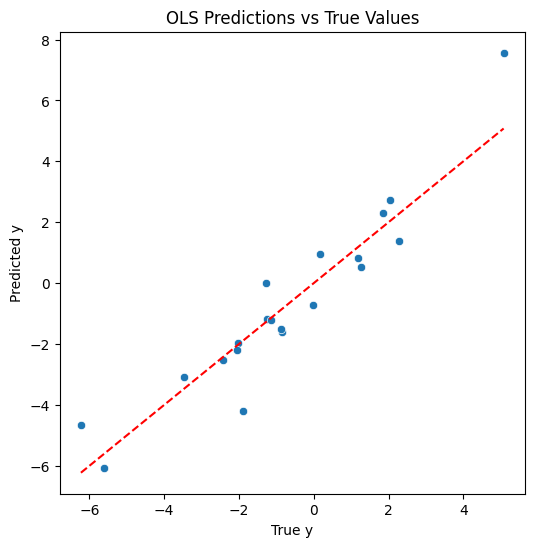

In [22]:

# --- 6. Visualization ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("OLS Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
